In [1]:
import clustertools as ctools
import numpy as np

# Functions

Load a snapshot of a cluster in file 00000.dat, which has position units of pc and velocity units of km/s in clustercentric coordinates. Stellar masses are in solar units and were generated using a Salpeter IMF.

In [2]:
cluster=ctools.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster')

Once initialized, any function within ``clustertools`` can be called internally via ``cluster.function_name()`` or externally via ``output=function_name(cluster)``. An internal call sets variables within ``cluster`` while an external call will return the calculated values but change nothing within ``cluster``.

In the event that the snapshot is not centered, the centre of the cluster can be found via:

In [3]:
cluster.find_centre()
print(cluster.xc,cluster.yc,cluster.zc)

-0.149461195567 -0.220877437384 -0.0387801165707


or

In [4]:
xc,yc,zc,vxc,vyc,vzc=ctools.find_centre(cluster)
print(xc,yc,zc)

-0.149461195567 -0.220877437384 -0.0387801165707


It is important to note that, by default, the centre is calculated to be the centre of density. Similar to NBODY6 and phigrape, once the centre of density is found for the entire cluster population, a centralized subset of stars within an ever decreasing radius are used to find the true centre of density. The parameters ``rmin`` and ``nmax`` set the minimum radius that can encompass the subset of stars and the maximum number of stars within the subset. 

Setting ``density=False`` will instead find a central subset of stars to find the cluster's of centre by removing stars beyond ``nsigma`` standard deviations of the previously calculated centre. For systems with a large number of escaped stars, which make finding the cluster's centre difficult, it may also help to tell the function where to start. For example, it is possible to tell the cluster to start looking for the centre 1 pc away from the origin along the x-axis and remove stars beyond two standard deviations via:

In [5]:
cluster.find_centre(xstart=1.,density=False, nsigma=1)

Other functions that can be called include:

In [6]:
print('Half-Mass Relaxation Time: ',ctools.half_mass_relaxation_time(cluster))
print('Core Relaxation Time: ',ctools.core_relaxation_time(cluster))
print('Lagrange Radii: ',ctools.rlagrange(cluster))
print('Virial Radius: ',ctools.virial_radius(cluster))

Half-Mass Relaxation Time:  50.0495603562
Core Relaxation Time:  13.7137370833
Lagrange Radii:  [0.45296852224404172, 1.6747336886382542, 0.85763015700515854, 2.1140256120513246, 2.3598508504454285, 2.9993357861477326, 3.57394375759546, 3.6062209281265409, 5.590463514507733, 8.1648352217132008]
Virial Radius:  2.51937714706


It is also possible to easily measure the mass function and its slope:

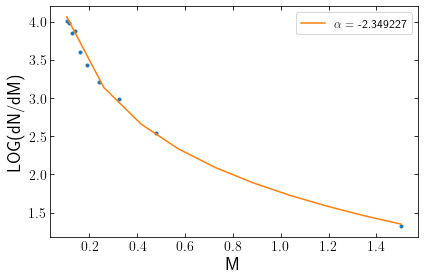

In [7]:
m_mean, m_hist, dm, alpha, ealpha, yalpha, eyalpha=ctools.mass_function(cluster,plot=True)

How velocity dispersion varies with mass can also be viewed and the slope (eta) can be measured.

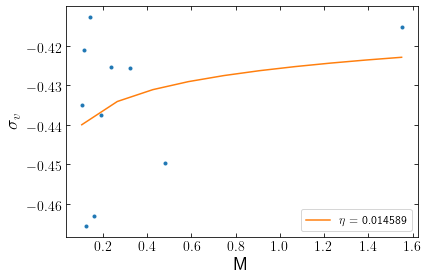

In [8]:
m_mean, sigvm, eta, eeta, yeta, eyeta=ctools.eta_function(cluster,plot=True)

In [10]:
#Still need to add rtide, rlimiting, energies, closest star